# Extracting target contigs

In order to extract the contigs representing your target sequences (the sequences that were being captured during the sequence capture process), you need to provide a fasta file containing the reference sequences for all loci of interest. Ususally all sequences of interest should be present in the file that was used to design the RNA baits for sequence capture. If you are using some standarad RNA bait library that was not specifically designed for your organism group/project (e.g. [Ultraconserved Elements - UCEs](http://ultraconserved.org/)), you can usually find the reference library on the webpage of the developer or in the respective publication. If all else fails, you can try to extract sequences of the same loci that you captured, for organisms that are closely related to your taxa, e.g. from [NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/).

The reference library should be in simple fasta format, containign one sequence per locus of interest. Here is an example of a reference library that was used in our example dataset of palms, extracted from [Heyduk et al., 2016](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/biolinnean/117/1/10.1111_bij.12551/1/bij12551.pdf?Expires=1501614586&Signature=I4wDg~SKpYmSEE9cEE0rZw2XLo9zcqFhPoijZ1Qeq78nX5XcnXSPwCw~9j4QxKH16BjKfkleb~wOF5RiKdTr0PmKkUYraQfeb7mD6jPBr5RgNlDcjsLV3ezZ1VyoT-4MZ9HxnYNPE0poXJcUXor1B5YYSYGBxxW1Q~zWYqzdos2VhoCP9eK7phRocpR~hhvbJx4aJDxAQdPleOpNPpknkkmoX~dTyHr2B8C7~t5v7f4DiZVEnOz0VQ9JbPw02iY13n67Qq2VfLA3HPYkui-PGfLKY0yCFKRp2xFrnjeIBV9TKZ~vuJngcua-L6URZ8cIdwzvo9GFAVDYxWUs0DywHw__&Key-Pair-Id=APKAIUCZBIA4LVPAVW3Q):

**Citation:** *Heyduk, K., Trapnell, D. W., Barrett, C. F., & Leebens-Mack, J. (2016). Phylogenomic analyses of species relationships in the genus Sabal (Arecaceae) using targeted sequence capture. Biological Journal of the Linnean Society, 117, 106–120.*

In [3]:
%%bash
head ../../data/raw/palm_reference_sequences.fasta

>Elaeis_1007_0
TGGGAGTCGCCGGGCATTTCTGGGATCTCCTCAAGCCCTACGCCCGGAACGAGGGCGTCGACTTCCTCCGGAACAAGCGCGTCGCCATCGACCTCTCCTTCTGGATCGTCCAGCACGGGGCTGCCATCCGCAACAAAACCTCTCGCCTCCGCAATCCCCACATCCGCACCACCTTTTTCCGTACTGTCGCCTTGTTT
>Elaeis_1007_1
TCGAAGATGGGGGCGTTCCCGGTGTTCGTCGTTGACGGCGAGCCATCGCCGTTGAAGACGCAGGCAAGGATGGAGCGCTTCTTCTGCAACTCTGGTGTTGATCCTTCGACGCTGTCGAAGGCGGAGGAAGGGGAGGAGTCTCCTGTGAAACAGAGGAATCAGGCATTCACCAGATGCGTTCGGGAGTGCGTG
>Elaeis_1007_2
GAACTCCTCGAAATCCTAGGGATGCCAGTTCTAAGAGCATGTGGTGAGGCTGAAGCCCTGTGTGCACAGTTAAATAGTGAAGGCCATGTTGATGCTTGCATCACTGCCGACAGTGATGCTTTCCTGTTTGGGGCGAAATGTGTCATAAAGTGCCTTCGCTCCAATTGCAAG
>Elaeis_1007_3
GACCCATTTGAGTGCTACAACATATCAGATGTTGAAGCTGGTCTTGGTTTGAAGAGAAAACAAATGGTAGCCATTGCTCTTCTGGTCGGTAATGACCATGATTTGCATGGGGTATCTGGGTTTGGGGGTTGATACGGCTGTCCGATTTGTAAAGATGTTTAGTGAGGATGAAATTTTGGCTA
>Elaeis_1007_4
GGTTATGTGAGGTTGGTAAAGGGGTTTTCCCTTTTTCAGAGGGAAGCATCAGTTTGGCCATGGATCCCCACATGCCTATTTCAAATGAGGTTTCACCGAGTGCAAGATCTCCACACTGCTCACATTGTGGTCACCCAGGCAGCAAGAAAGCTCATCAGAAGACTGCTTGTGAATACTGT

## Find and extract all target contigs
Once you got your reference fasta files ready you are good to start with extracting the contigs of interest. For this purpose we want to create an overview over which contigs represent which reference locus in each sample. At the same time we also have to be somewhat selective and discard potential duplicates that match several loci. Let's check the function that helps you do this:

In [3]:
%%bash
source activate secapr_env
secapr find_target_contigs -h

usage: secapr find_target_contigs [-h] --contigs CONTIGS --reference REFERENCE
                                  --output OUTPUT
                                  [--min-coverage MIN_COVERAGE]
                                  [--min-identity MIN_IDENTITY]
                                  [--regex REGEX] [--keep-duplicates]

Extract the contigs that match the reference database

optional arguments:
  -h, --help            show this help message and exit
  --contigs CONTIGS     The directory containing the assembled contigs in
                        fasta format.
  --reference REFERENCE
                        The fasta-file containign the reference sequences
                        (probe-order-file).
  --output OUTPUT       The directory in which to store the extracted target
                        contigs and lastz results.
  --min-coverage MIN_COVERAGE
                        The minimum percent coverage required for a match
                        [default=80].
  --min-identity 

Before running the script, you should take a look at the fasta headers in your reference fasta file. The script will use the fasta headers to extract the locus names. By default it takes the complete fasta header as the locus name. However, in many cases there is a lot of information in the fasta headers which you may not want to keep and translate as locus names (e.g. **>RPB2_intron23 Geonoma weberbaueri RNA polymerase II second largest subunit** should preferably translate into the locus name **RPB2_intron23** and discard all the rest of the header). If your fasta sequences are named consistently you can define a [regular expression](http://www.rexegg.com/regex-quickstart.html), using the `--regex` flag in order to only use the part of the string you are interested in. You can only define a single regex for the whole fasta file, which will be applied to all fasta headers in the same way.

Further, you can choose to add the `--keep-duplicates` flag, in order to also keep contigs which span across multiple loci. These will be extracted independently for each contig thhey match and may hence be present in several copies in the FASTA file containing your extracted contigs. If this flag is used a txt file with the duplicate informaiton is being printed into the output directory.

The sensitivity of the blast algorithm (LASTZ) can be altered with the flags `--min-coverage` and `--min-identity`. High values mean conservative matching requirements, while low values will return more matches but also possibly non-orthologous sequences.

Now let's run the script.

    secapr find_target_contigs --contigs ../../data/processed/contigs/ --reference ../../data/raw/palm_reference_sequences.fasta --output ../../data/processed/target_contigs --regex '\w+_\d+_\d+' --keep-duplicates
    
To get a first idea of the resulting matches, you can have a look at the file `match_table.txt` in the output folder.

In [57]:
import pandas as pd
table = pd.read_csv('../../data/processed/target_contigs/match_table.txt', delimiter = '\t',index_col=0)
table

,sample_1061,sample_1063,sample_1064,sample_1065,sample_1068,sample_1070,sample_1073,sample_1074,sample_1079,sample_1080,sample_1082,sample_1083,sample_1085,sample_1086,sample_1087,sample_1140,sample_1166
Elaeis_1007_0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elaeis_1007_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elaeis_1007_2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elaeis_1007_3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elaeis_1007_4,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Elaeis_1007_5,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1
Elaeis_1007_6,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1
Elaeis_1007_7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Elaeis_1013_5,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0
Elaeis_1013_6,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


Those fields containing a '1' indicate that a unique match was extracted from the contig sequences for the respective exon and sample. If the output reveals a very low harvest of target sequences, you can try to reduce the values for the flags `--min-coverage` and `--min-identity` in order to be more generous in the matching step. If on the other hand your output turns out to capture a lot of non-homologous sequences between the different samples (can be identified after the [alignment step](align_contigs.ipynb)), you may want to turn up the values for these flags in order to be more conservative in your search.

The script also prints out summary stats in a textfile in the output folder:

In [59]:
%%bash
cat ../../data/processed/target_contigs/summary_stats.txt

Total number of samples: 17
Total number of targeted exons: 837

120 exons are shared by all samples.

sample_1061: 545 extracted contigs
sample_1063: 525 extracted contigs
sample_1064: 543 extracted contigs
sample_1065: 544 extracted contigs
sample_1068: 563 extracted contigs
sample_1070: 539 extracted contigs
sample_1073: 529 extracted contigs
sample_1074: 531 extracted contigs
sample_1079: 550 extracted contigs
sample_1080: 531 extracted contigs
sample_1082: 556 extracted contigs
sample_1083: 534 extracted contigs
sample_1085: 512 extracted contigs
sample_1086: 516 extracted contigs
sample_1087: 562 extracted contigs
sample_1140: 469 extracted contigs
sample_1166: 544 extracted contigs
mean: 534.882353 stdev: 21.605779

Let's plot the matrix for a better overview of our contig data:

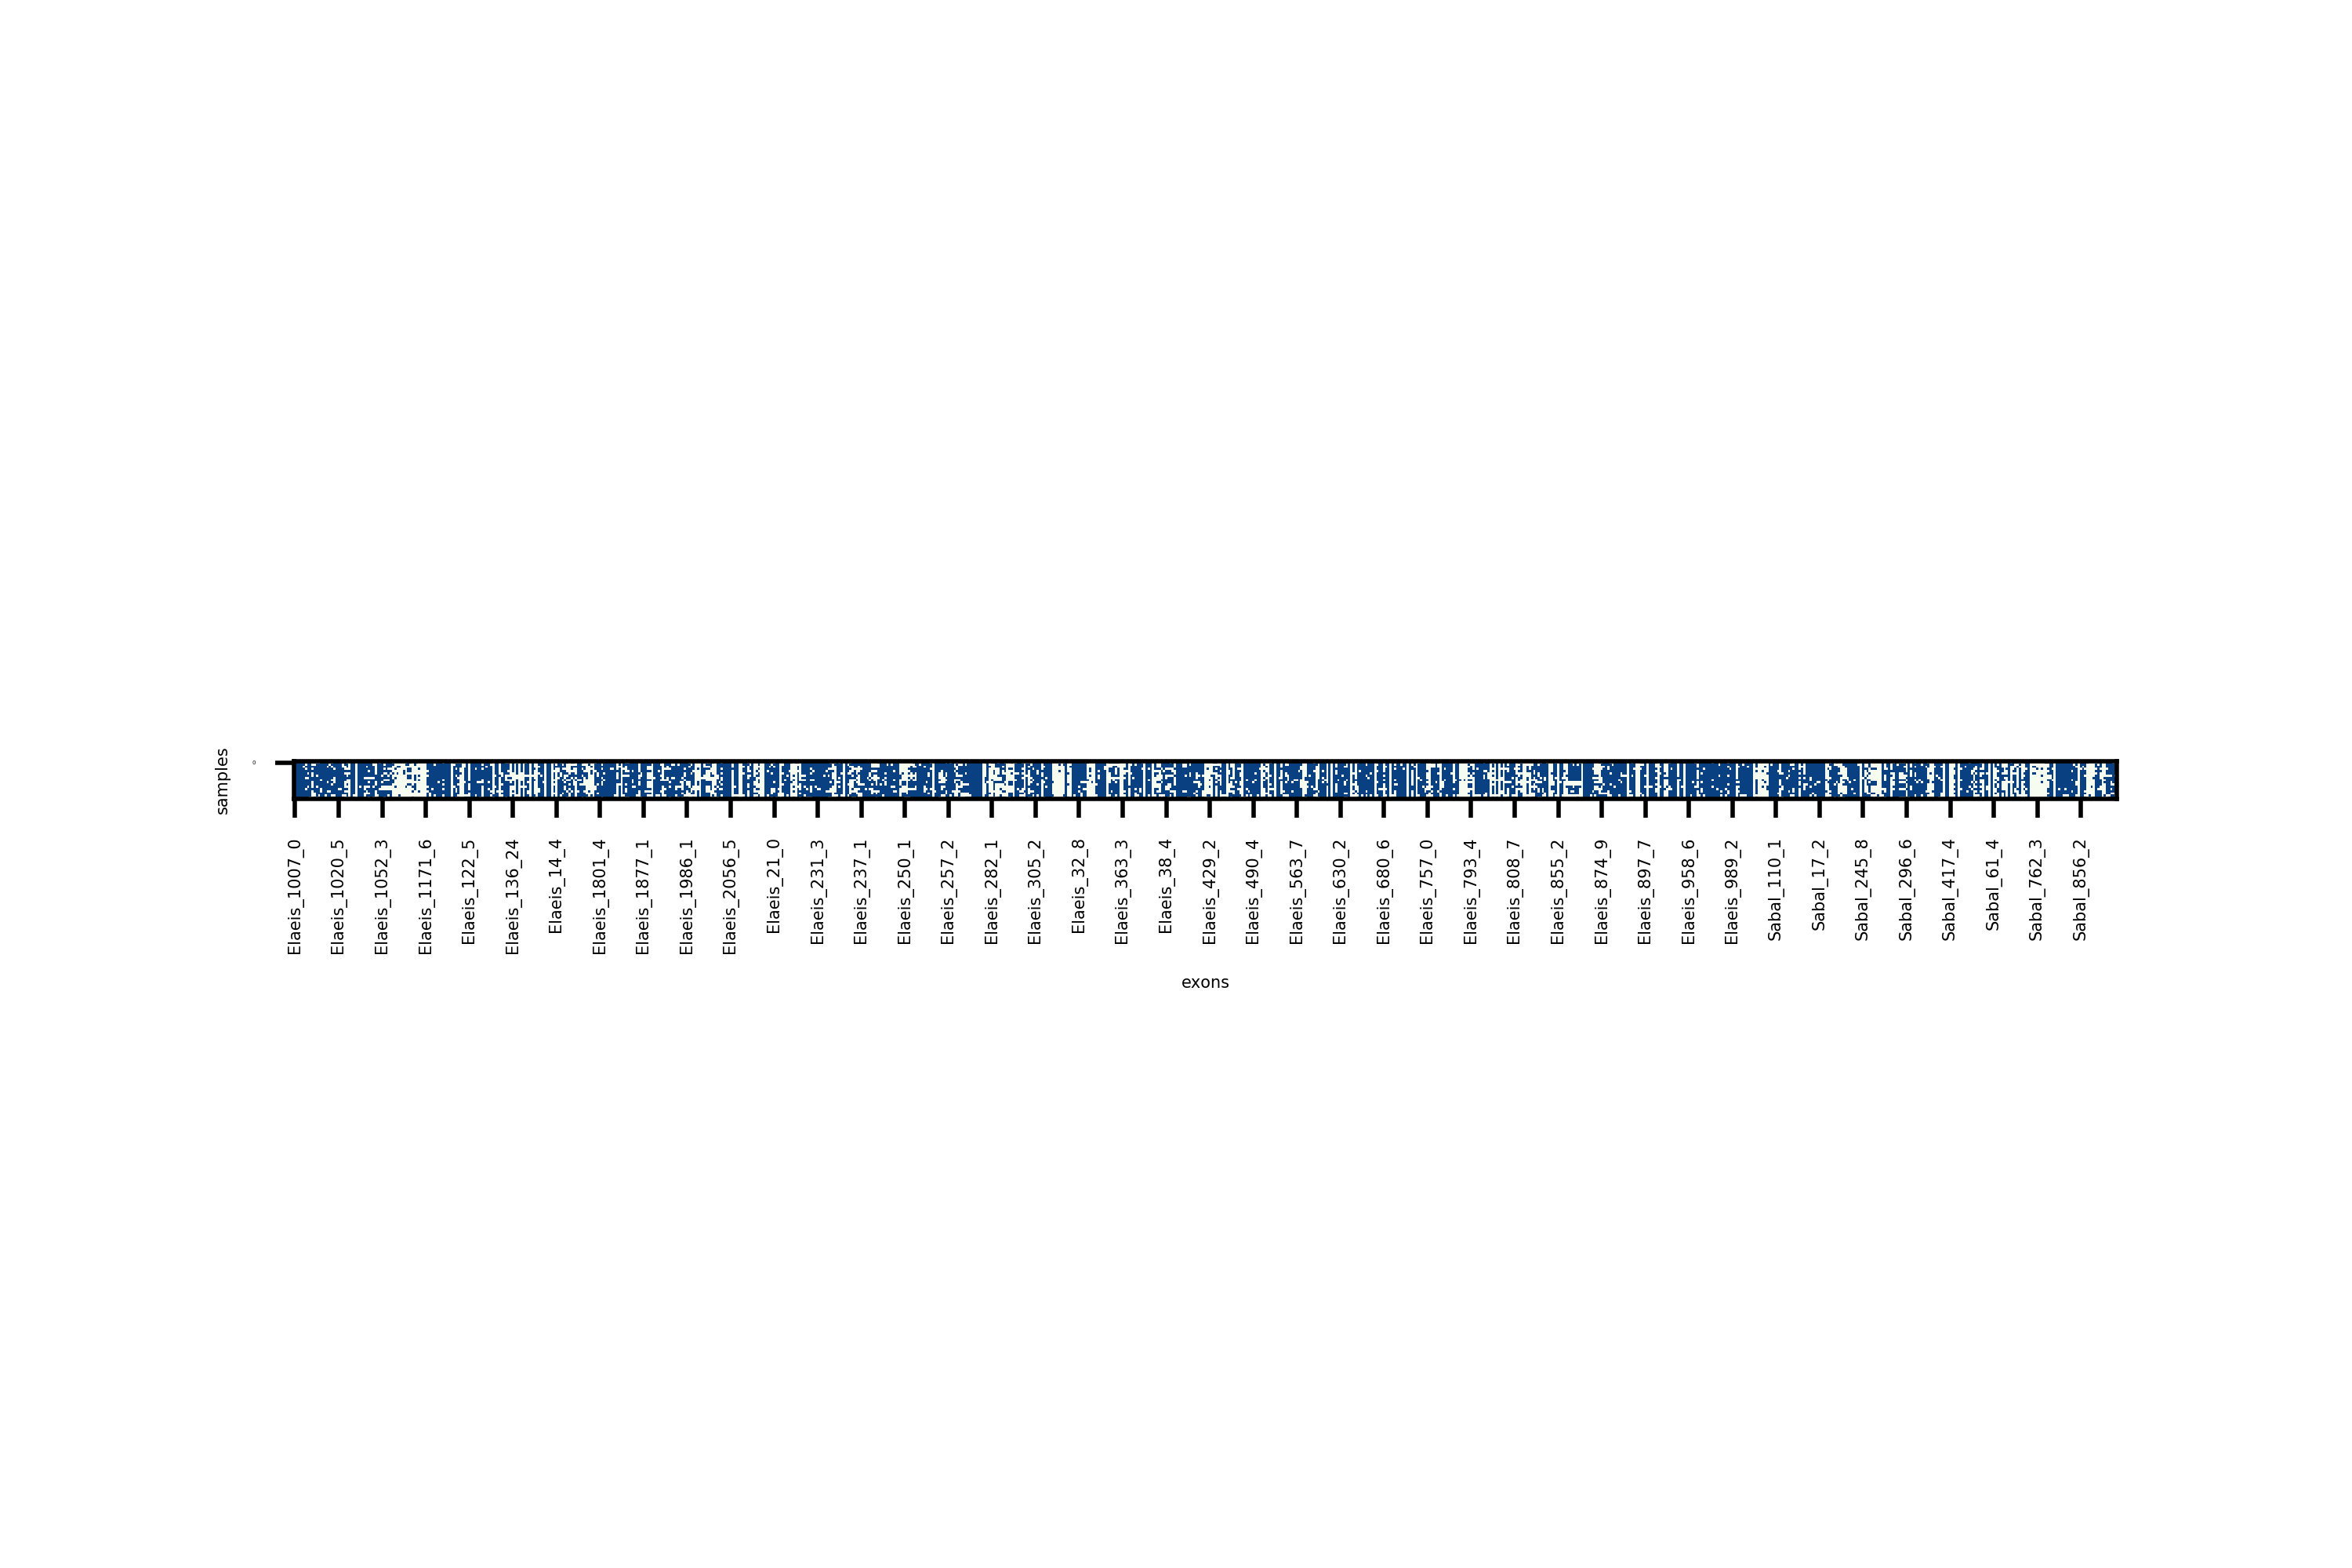

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Get the data from the df
sample_labels = table.columns
locus_labels = np.array(table.index)
data = np.matrix(table).T
# Define the figure and plot to png file
fig, ax = plt.subplots()
data
mat = ax.imshow(data, cmap='GnBu', interpolation='nearest')
plt.xticks(range(data.shape[1])[::20], locus_labels[::20],fontsize=3)
plt.yticks([0],fontsize=0)
#plt.yticks(range(data.shape[0])[::3], sample_labels[::3],fontsize=3)
plt.xticks(rotation=90)
plt.xlabel('exons',fontsize=3)
plt.ylabel('samples',fontsize=3)
fig.savefig(os.path.join('../../data/processed/target_contigs/','contig_exon_matrix.png'), dpi = 500)

from IPython.display import Image
Image("../../data/processed/target_contigs/contig_exon_matrix.png")

It is difficult to plot the matrix nicely to fit this documentation document. Instead we recommend you to open the png file that was printed by the code above and inspect the plotted matrix by zooming in on the png file. Blue means presence and white means absence of the locus (x-axis) for the respective sample (y-axis).

If you are satisfied with your contig yield you are ready to continue to the [alignment step](align_contigs.ipynb).

[Previous page](contig_assembly.ipynb) | [Next page](align_contigs.ipynb)